Задание 6. Предварительная обработка данных

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по темам раздела 4.

Шаг 2. Выполните предварительную обработку данных (очистку данных) предложенного датасета.  (Алгоритм выполнения представлен в практическом занятии по теме 4.3).

2.1 Загрузите исходные данные;

2.2 Изучите типы данных, наличие пропущенных значений, дублирующихся записей (признаков);

2.3 Изучите описательные статистики признаков. Выделите признаки, требующие, по Вашему мнению, предварительной обработки;

2.4 Для выделенных признаков выполните предварительную обработку (по необходимости): корректировка типов данных; работа с дублями, поиск и обработка аномальных значений (по значениям 1-99); обработка пропущенных значений.    

Шаг 3. Опубликуйте файл расширения ipynb на платформе Odin.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_telecom+(2).csv')

In [3]:
print(df.shape)
print(df.dtypes)
df.head(5)

(4492, 11)
Возраст                                    int64
Среднемесячный расход                    float64
Средняя продолжительность разговоров     float64
Звонков днем за месяц                    float64
Звонков вечером за месяц                 float64
Звонков ночью за месяц                    object
Звонки в другие города                    object
Звонки в другие страны                     int64
Доля звонков на стационарные телефоны     object
Количество SMS за месяц                   object
Дата подключения тарифа                   object
dtype: object


,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


## Пропуски

In [4]:
# Получаем количество пропусков
missing_values = df.isna().sum()
# Получаем процент пропусков
missing_percentage = (missing_values / df.shape[0]) * 100
# Объединяем в один DataFrame
missing_info = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})
# Создаем переменную с пропусками
missing_info = missing_info[missing_info['Количество пропусков'] > 0]
print(missing_info)

                                      Количество пропусков  Процент пропусков
Среднемесячный расход                                   24           0.534283
Средняя продолжительность разговоров                    17           0.378451
Звонков днем за месяц                                   20           0.445236
Звонков вечером за месяц                                 3           0.066785


In [5]:
# посмотрим пропуски больше 2-х в строке
df_miss_row = df[df.isna().sum(axis=1) >= 2]
df_miss_row

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
86,48,484.44,NaN,NaN,45.0,4,0,0,11,4,2016-08-10 16:06:26
299,31,NaN,3.8,NaN,89.0,0,0,0,0,48,2020-12-27 12:11:03


## Дубликаты

In [6]:
# Ищем дубликаты столбцов
duplicate_columns = []
columns = df.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if df[columns[i]].equals(df[columns[j]]):
            duplicate_columns.append((columns[i], columns[j]))

print("Пары одинаковых столбцов:")
for col1, col2 in duplicate_columns:
    print(f"{col1} и {col2} имеют одинаковые значения.")

Пары одинаковых столбцов:


In [7]:
# Вывод строк с дубликатами
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Возраст, Среднемесячный расход, Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города, Звонки в другие страны, Доля звонков на стационарные телефоны, Количество SMS за месяц, Дата подключения тарифа]
Index: []


In [8]:
sum(df.duplicated())

0

In [9]:
# Статистики
df.describe()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонки в другие страны
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4492.000000
mean,41.894924,505.533577,4.230827,63.899374,70.363778,0.394034
std,13.077254,646.354693,3.005210,62.877394,41.219909,1.171980
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,0.000000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,0.000000
max,70.000000,5142.760000,20.000000,500.000000,160.000000,12.000000


Histogram for Возраст


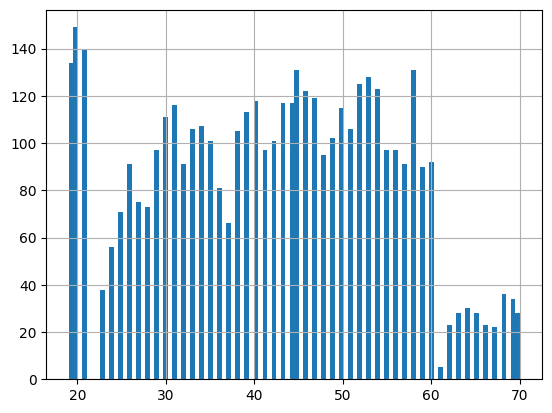

Histogram for Среднемесячный расход


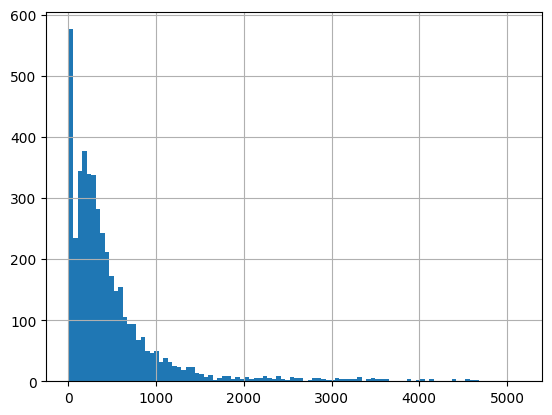

Histogram for Средняя продолжительность разговоров


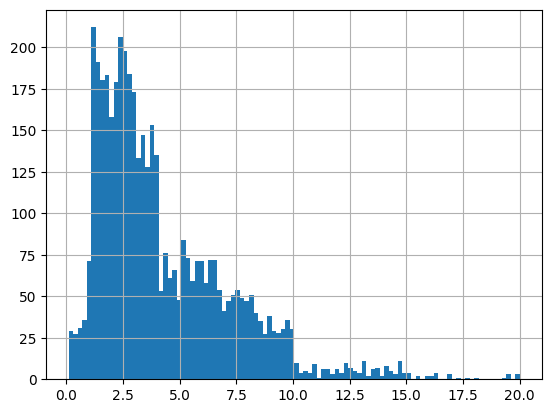

Histogram for Звонков днем за месяц


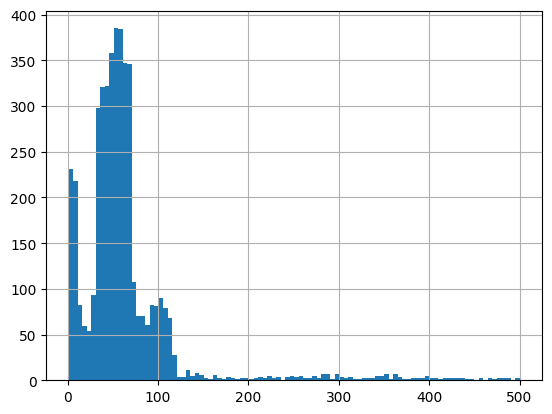

Histogram for Звонков вечером за месяц


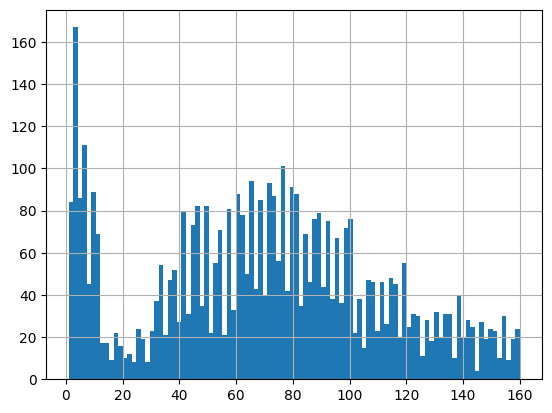

Histogram for Звонков ночью за месяц


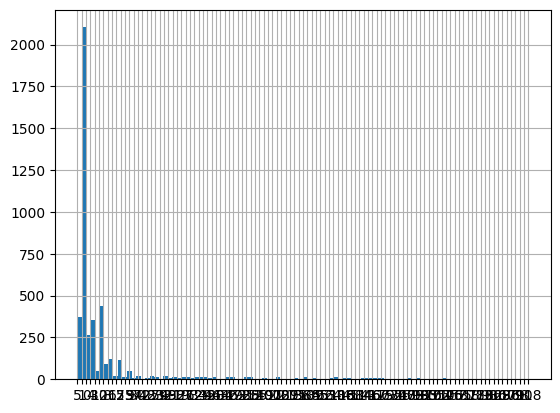

Histogram for Звонки в другие города


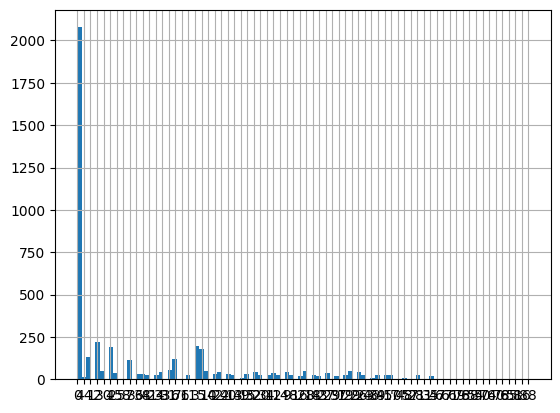

Histogram for Звонки в другие страны


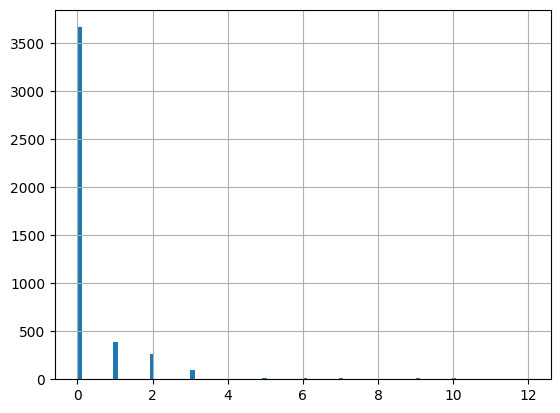

Histogram for Доля звонков на стационарные телефоны


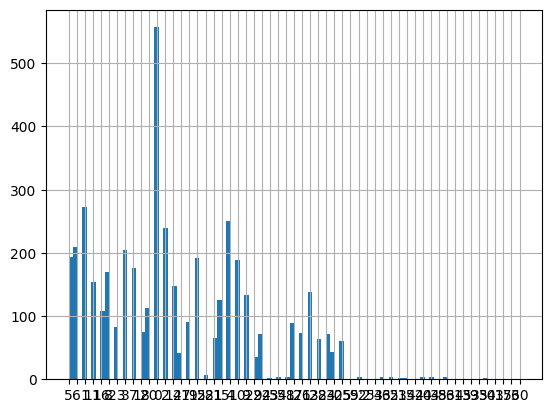

Histogram for Количество SMS за месяц


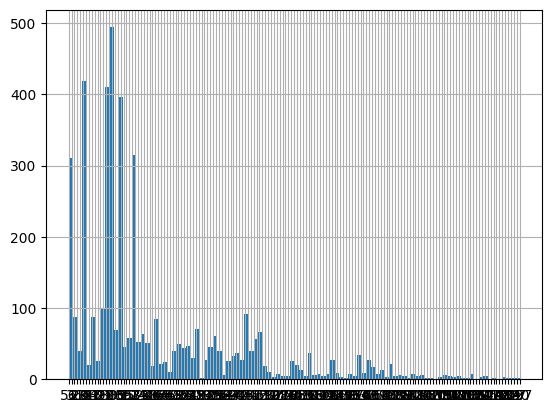

Histogram for Дата подключения тарифа


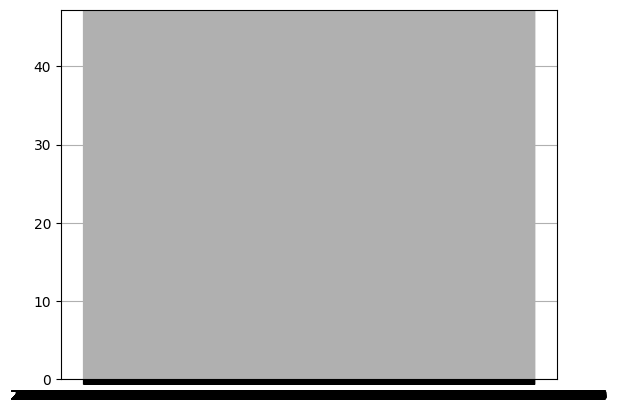

In [10]:
# Посмотрим распределения
for col in df.columns:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.show()

## Очистка данных

## Заполнение пропусков

In [11]:
# Посмотрим на пропуски
missing_info

,Количество пропусков,Процент пропусков
Среднемесячный расход,24,0.534283
Средняя продолжительность разговоров,17,0.378451
Звонков днем за месяц,20,0.445236
Звонков вечером за месяц,3,0.066785


In [12]:
# предположим что пропуски в признаках: Звонков днем за месяц и Звонков вечером за месяц
# обусловлены отсутствием значений и заполним их "0"
df['Звонков вечером за месяц'] = df['Звонков вечером за месяц'].fillna(0)
df['Звонков днем за месяц'] = df['Звонков днем за месяц'].fillna(0)

In [13]:
# Заполним пропуски в: Среднемесячный расход, Средняя продолжительность разговоров на среднее значение

# Расчет средних значений для указанных столбцов
mean_expense = df['Среднемесячный расход'].mean()
mean_duration = df['Средняя продолжительность разговоров'].mean()

# Заполнение пропусков средними значениями
df['Среднемесячный расход'] = df['Среднемесячный расход'].fillna(mean_expense)
df['Средняя продолжительность разговоров'] = df['Средняя продолжительность разговоров'].fillna(mean_duration)


In [14]:
# Проверим результата
missing_values = df.isna().sum()
# Получаем процент пропусков
missing_percentage = (missing_values / df.shape[0]) * 100
# Объединяем в один DataFrame
missing_info = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})
# Создаем переменную с пропусками
missing_info = missing_info[missing_info['Количество пропусков'] > 0]
print(missing_info)

Empty DataFrame
Columns: [Количество пропусков, Процент пропусков]
Index: []


## Приведение типов данных

In [15]:
print(df.dtypes)
df.head(5)

Возраст                                    int64
Среднемесячный расход                    float64
Средняя продолжительность разговоров     float64
Звонков днем за месяц                    float64
Звонков вечером за месяц                 float64
Звонков ночью за месяц                    object
Звонки в другие города                    object
Звонки в другие страны                     int64
Доля звонков на стационарные телефоны     object
Количество SMS за месяц                   object
Дата подключения тарифа                   object
dtype: object


,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,505.533577,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.510000,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.700000,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.230000,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.600000,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


In [16]:
# Приведем признак 'Дата подключения тарифа' к типу datetime
df['Дата подключения тарифа'] = pd.to_datetime(df['Дата подключения тарифа'], errors='coerce')

In [17]:
# Приведем остальные признаки к типам int или float
for column in df.columns:
    if column != 'Дата подключения тарифа':
        # Попробуем сначала привести к int
        df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')
        # Если не удалось, попробуем привести к float
        df[column].fillna(0, inplace=True)  # Заменим NaN на 0 перед приведением к float
        df[column] = df[column].astype(float, errors='ignore')  # Приводим к float, если не int

In [18]:
# Приведем признаки:  Возраст, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города,
# Звонки в другие страны, Доля звонков на стационарные телефоны, Количество SMS за месяц к типу int
col_to_int = ['Возраст', 
              'Звонков днем за месяц', 
              'Звонков вечером за месяц', 
              'Звонков ночью за месяц', 
              'Звонки в другие города',
              'Звонки в другие страны', 
              'Доля звонков на стационарные телефоны', 
              'Количество SMS за месяц'
              ]

for col in col_to_int:
    try:
        df[col] = df[col].astype(int)
    except ValueError:
        print(f"Не удалось преобразовать столбец {col} в int.")


In [19]:
df.dtypes

Возраст                                           int64
Среднемесячный расход                           float64
Средняя продолжительность разговоров            float64
Звонков днем за месяц                             int64
Звонков вечером за месяц                          int64
Звонков ночью за месяц                            int64
Звонки в другие города                            int64
Звонки в другие страны                            int64
Доля звонков на стационарные телефоны             int64
Количество SMS за месяц                           int64
Дата подключения тарифа                  datetime64[ns]
dtype: object

In [20]:
# Создадим переменные, хранящие категориальные и числовые признаки
# по принципу: до 7 значений - категориальный

category = []
numeric = []
df_types = df.copy()
for i in df_types.columns:
    if len(df[i].value_counts()) <= 10:
        category.append(i)
    else:
        numeric.append(i)

print('category:', len(category), 'numeric:', len(numeric))

category: 0 numeric: 11


## Обработка выбросов и аномалий 

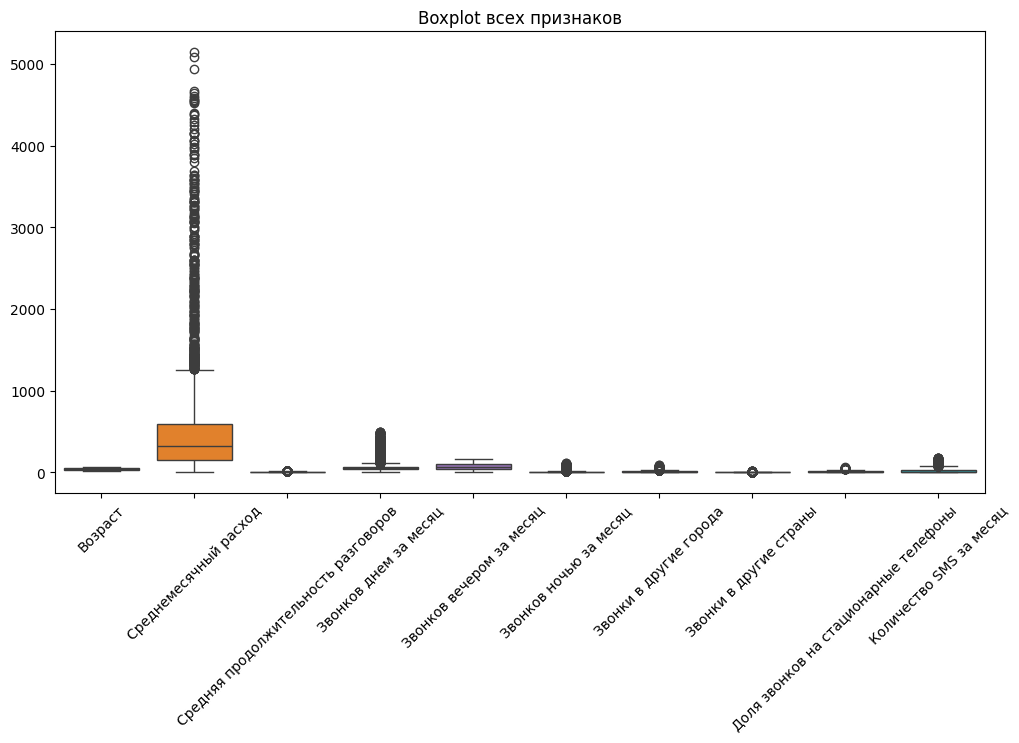

In [21]:
# посмотрим на данные
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Создаем boxplot для всех числовых признаков
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)  # Поворот меток по оси x для удобства чтения
plt.title('Boxplot всех признаков')
plt.show()

In [22]:
def calculate_iqr_boundaries(series):
  q25 = series.quantile(0.25)
  q75 = series.quantile(0.75)
  iqr = q75 - q25

  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries

In [23]:
for i in numeric_cols:
    bounds = calculate_iqr_boundaries(df[i])
    out_l = sum(df[i] < bounds[0])
    out_r = sum(df[i] > bounds[1])
    print('-------', i, '-------')
    print('Размах', bounds)
    print('Количество выбросов', out_l, out_r)
    #plt.boxplot(df[i])
    #plt.show()
    print('=======+++++++=======')

------- Возраст -------
Размах (-0.5, 83.5)
Количество выбросов 0 0
=======+++++++=======
------- Среднемесячный расход -------
Размах (-511.96874999999994, 1263.1612499999999)
Количество выбросов 0 333
=======+++++++=======
------- Средняя продолжительность разговоров -------
Размах (-3.6, 11.600000000000001)
Количество выбросов 0 125
=======+++++++=======
------- Звонков днем за месяц -------
Размах (-12.0, 116.0)
Количество выбросов 0 261
=======+++++++=======
------- Звонков вечером за месяц -------
Размах (-42.0, 182.0)
Количество выбросов 0 0
=======+++++++=======
------- Звонков ночью за месяц -------
Размах (-7.5, 12.5)
Количество выбросов 0 521
=======+++++++=======
------- Звонки в другие города -------
Размах (-18.0, 30.0)
Количество выбросов 0 494
=======+++++++=======
------- Звонки в другие страны -------
Размах (0.0, 0.0)
Количество выбросов 0 823
=======+++++++=======
------- Доля звонков на стационарные телефоны -------
Размах (-16.5, 35.5)
Количество выбросов 0 49
===

In [24]:
# Выбросы заменим на граничные квантильного размаха
to_quant = df.columns


num_cols_list = df[to_quant]
for i in num_cols_list:
    print('======', i, '=====')
    lower_bound, upper_bound = calculate_iqr_boundaries(df[i])

    out_l = df[df[i] < lower_bound]  # Строки с левыми выбросами
    out_r = df[df[i] > upper_bound]  # Строки с правыми выбросами

    # ИЛИ МЕДИАНУ
    #median_income = df[i].median()
    # Заменяем выбросы на медиану
    #df[i] = df[i].apply(lambda x: median_income if x < lower_bound or x > upper_bound else x)

    # Заменяем выбросы на граничные значения
    df[i] = df[i].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


    # После замены, пересчитываем границы
    lower_bound, upper_bound = calculate_iqr_boundaries(df[i])

    # Проверяем оставшиеся выбросы
    out_l = df[df[i] < lower_bound]  # Строки с левыми выбросами
    out_r = df[df[i] > upper_bound]  # Строки с правыми выбросами

    print('Размах', (lower_bound, upper_bound))
    print('Количество выбросов слева:', len(out_l))
    print('Количество выбросов справа:', len(out_r))
    print('Общее количество значений:', sum(df[i].value_counts()))

    if not out_l.empty:
        print('Выбросы слева:')
        print(out_l)

    if not out_r.empty:
        print('Выбросы справа:')
        print(out_r)

    print('=======+++++++=======')

====== Возраст =====
Размах (-0.5, 83.5)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4492
=======+++++++=======
====== Среднемесячный расход =====
Размах (-511.96874999999994, 1263.1612499999999)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4492
=======+++++++=======
====== Средняя продолжительность разговоров =====
Размах (-3.6, 11.600000000000001)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4492
=======+++++++=======
====== Звонков днем за месяц =====
Размах (-12.0, 116.0)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4492
=======+++++++=======
====== Звонков вечером за месяц =====
Размах (-42.0, 182.0)
Количество выбросов слева: 0
Количество выбросов справа: 0
Общее количество значений: 4492
=======+++++++=======
====== Звонков ночью за месяц =====
Размах (-7.5, 12.5)
Количество выбросов слева: 0
Количество выбросов спра

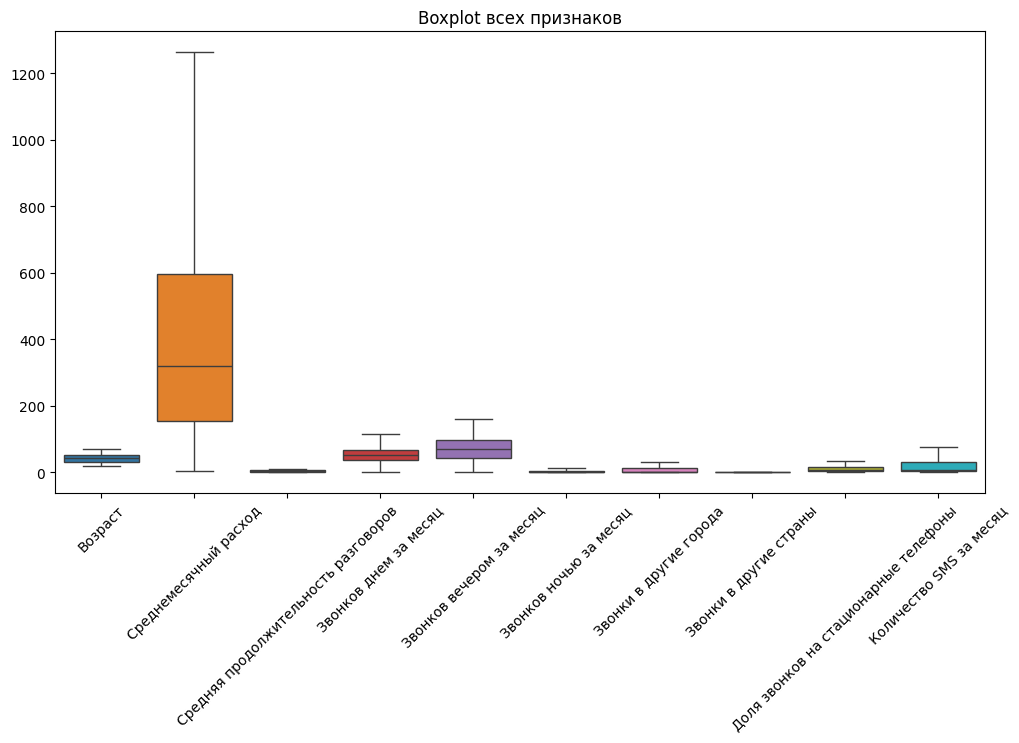

In [25]:
# посмотрим на получившийся результат
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Создаем boxplot для всех числовых признаков
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)  # Поворот меток по оси x для удобства чтения
plt.title('Boxplot всех признаков')
plt.show()

In [26]:
df.dtypes

Возраст                                           int64
Среднемесячный расход                           float64
Средняя продолжительность разговоров            float64
Звонков днем за месяц                           float64
Звонков вечером за месяц                          int64
Звонков ночью за месяц                          float64
Звонки в другие города                          float64
Звонки в другие страны                          float64
Доля звонков на стационарные телефоны           float64
Количество SMS за месяц                         float64
Дата подключения тарифа                  datetime64[ns]
dtype: object